<a href="https://colab.research.google.com/github/ShadyTarek10/AMIT-AI-Machine-Learning/blob/main/California_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

housing=pd.read_csv('/content/housing.csv')
housing


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [172]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [173]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

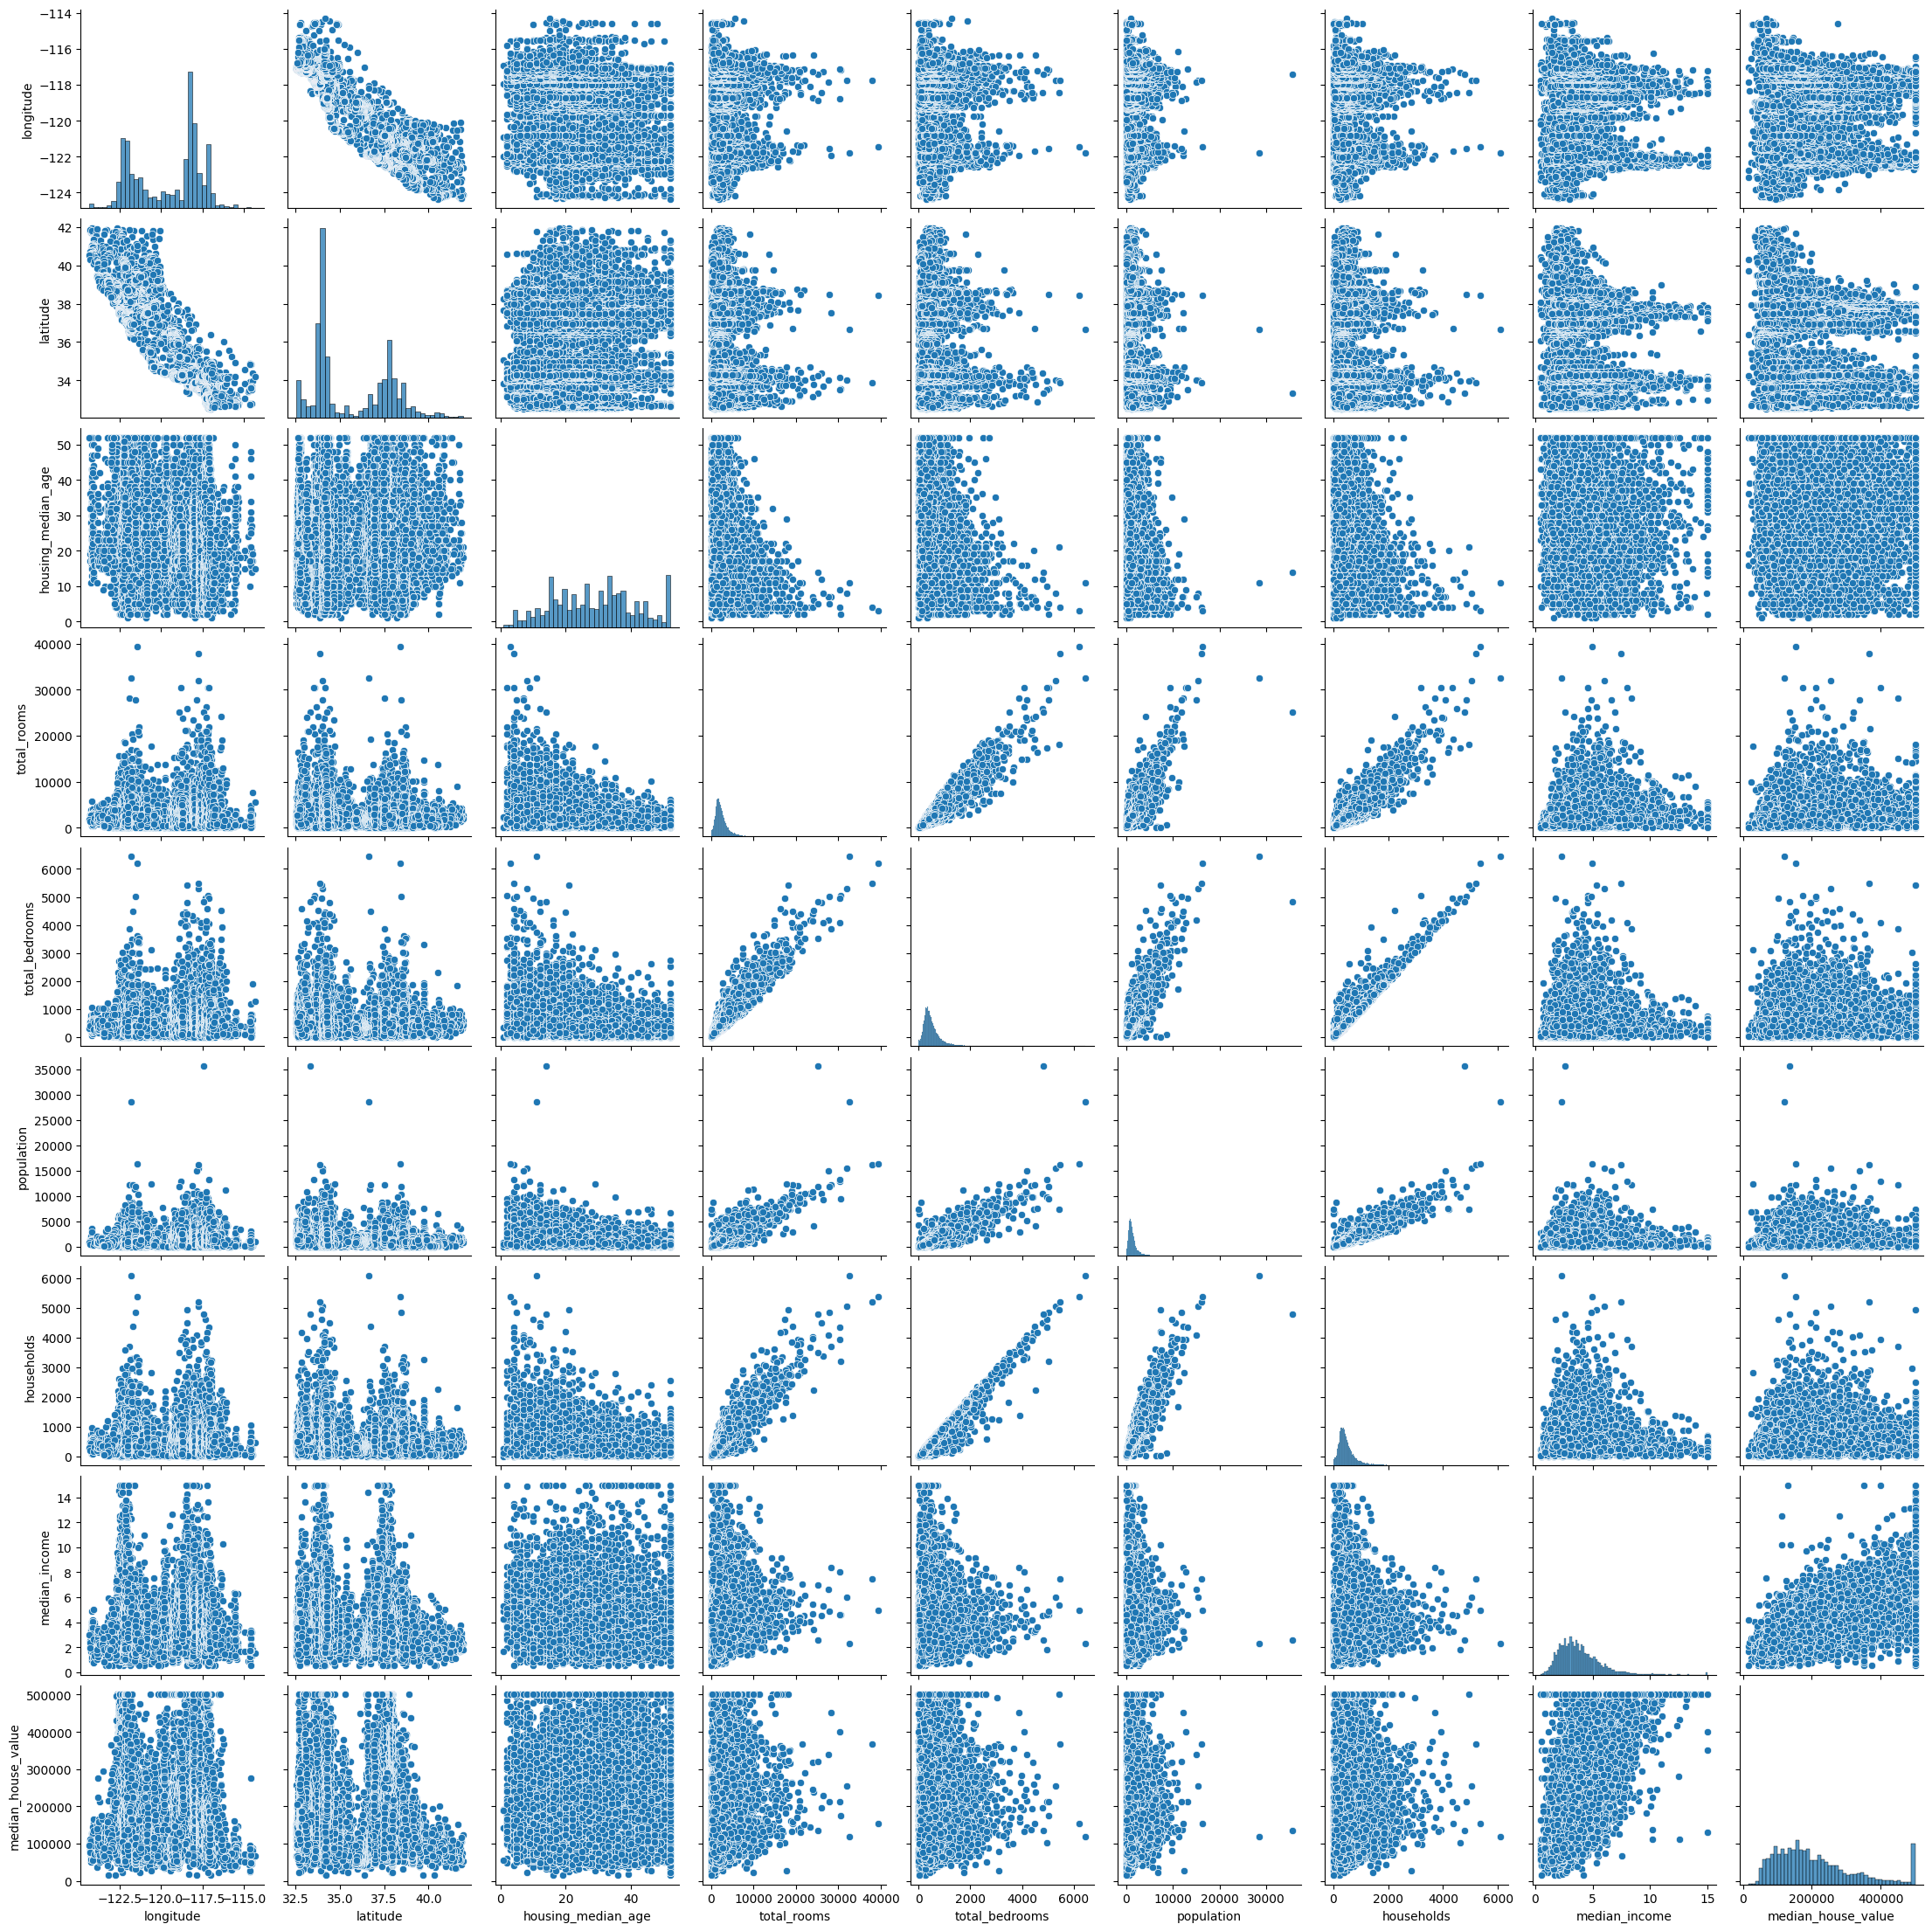

In [174]:
sns.pairplot(housing)

In [175]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [176]:
import numpy as np
from sklearn.impute import SimpleImputer
housing_copy=housing.copy()
ocean_prox=housing_copy['ocean_proximity']
housing_copy.drop('ocean_proximity',axis=1,inplace=True)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(housing_copy)
housing=imp_mean.transform(housing_copy)


In [177]:
housing=pd.DataFrame(housing,columns=housing_copy.columns,index=housing_copy.index)


In [178]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

<ipython-input-179-60bec1b8ba23>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing[column], ax=axes[i//3,i%3])
<ipython-input-179-60bec1b8ba23>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing[column], ax=axes[i//3,i%3])
<ipython-input-179-60bec1b8ba23>:6: UserWarning: 

`distplot

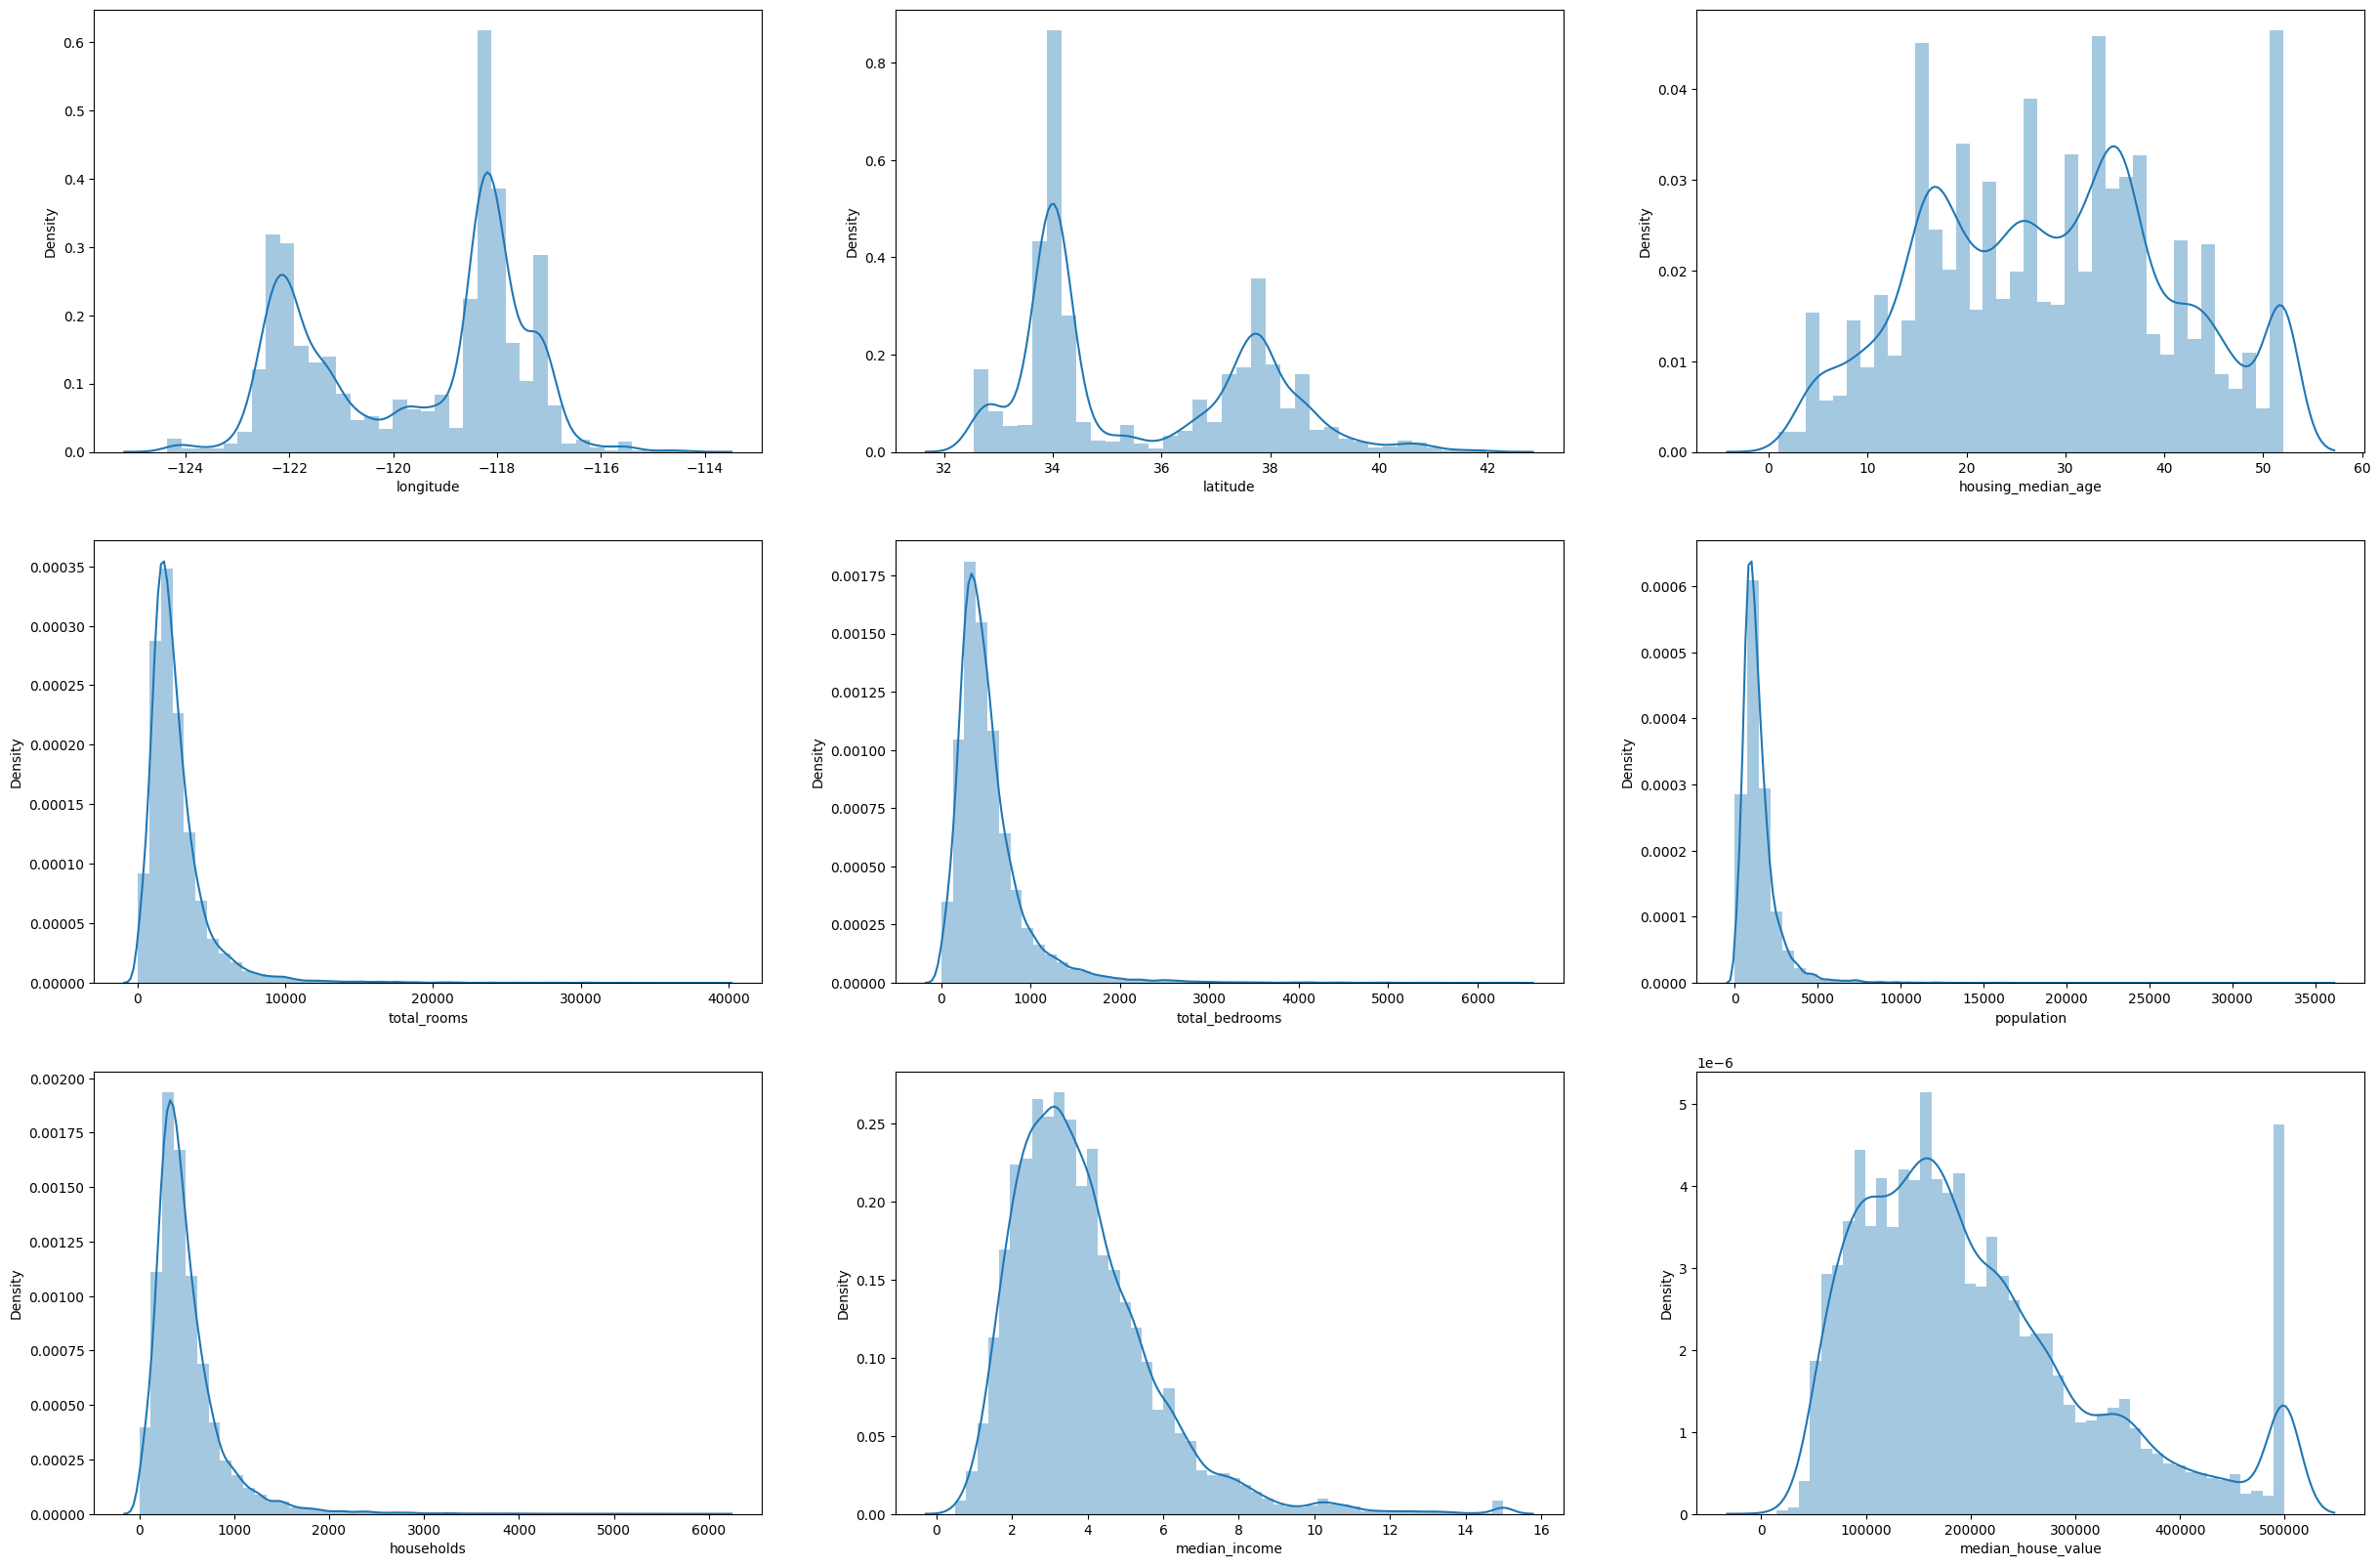

In [179]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
fig, axes = plt.subplots (ncols=3, nrows=3, figsize=(30,20))
for i, column in enumerate(columns):
  sns.distplot(housing[column], ax=axes[i//3,i%3])
plt.show()

In [180]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [181]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing,test_size=0.2,random_state=1234)
train_set['median_income'].value_counts()/len(test_set)

15.0001    0.009932
4.1250     0.008963
2.8750     0.008963
2.6250     0.008479
3.1250     0.008479
             ...   
4.7034     0.000242
5.2338     0.000242
3.3893     0.000242
5.3500     0.000242
5.4409     0.000242
Name: median_income, Length: 10945, dtype: float64

In [182]:
test_set['median_income'].value_counts()/len(test_set)

4.0000     0.003876
3.1250     0.003391
4.2500     0.002422
4.3750     0.002180
1.6250     0.002180
             ...   
10.1854    0.000242
3.1613     0.000242
3.2545     0.000242
4.7639     0.000242
13.3913    0.000242
Name: median_income, Length: 3441, dtype: float64

<Axes: >

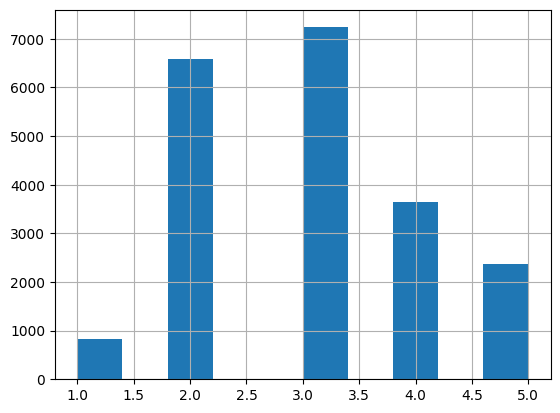

In [183]:
import numpy as np
housing['income_bin']=pd.cut(housing['median_income'], bins=[0.0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
housing['income_bin'].hist()

In [184]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, random_state=1234)
for  train_index, test_index in split.split(housing,housing['income_bin']):
  stratified_train=housing.loc[train_index]
  stratified_test=housing.loc[test_index]


In [185]:
stratified_train['income_bin'].value_counts()/len(stratified_train)

3    0.350560
2    0.318852
4    0.176303
5    0.114449
1    0.039836
Name: income_bin, dtype: float64

In [186]:
stratified_test['income_bin'].value_counts()/len(stratified_test)

3    0.350775
2    0.318798
4    0.176357
5    0.114341
1    0.039729
Name: income_bin, dtype: float64

In [187]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_encoded=ordinal_encoder.fit_transform(housing)
housing_encoded[:10]

array([[1.7000e+02, 5.1500e+02, 4.0000e+01, 7.3300e+02, 1.2800e+02,
        2.9600e+02, 1.2500e+02, 1.2416e+04, 3.6650e+03, 4.0000e+00],
       [1.7100e+02, 5.1300e+02, 2.0000e+01, 5.2550e+03, 1.1040e+03,
        2.3460e+03, 1.1290e+03, 1.2411e+04, 3.0740e+03, 4.0000e+00],
       [1.6900e+02, 5.1200e+02, 5.1000e+01, 1.3160e+03, 1.8900e+02,
        4.6900e+02, 1.7600e+02, 1.1941e+04, 3.0170e+03, 4.0000e+00],
       [1.6800e+02, 5.1200e+02, 5.1000e+01, 1.1230e+03, 2.3400e+02,
        5.3100e+02, 2.1800e+02, 1.0269e+04, 2.9170e+03, 3.0000e+00],
       [1.6800e+02, 5.1200e+02, 5.1000e+01, 1.4760e+03, 2.7900e+02,
        5.3800e+02, 2.5800e+02, 6.6560e+03, 2.9250e+03, 2.0000e+00],
       [1.6800e+02, 5.1200e+02, 5.1000e+01, 7.7200e+02, 2.1200e+02,
        3.8700e+02, 1.9200e+02, 7.0560e+03, 2.2670e+03, 2.0000e+00],
       [1.6800e+02, 5.1100e+02, 5.1000e+01, 2.3840e+03, 4.8800e+02,
        1.0670e+03, 5.1300e+02, 6.2090e+03, 2.5450e+03, 2.0000e+00],
       [1.6800e+02, 5.1100e+02, 5.1000e+0

In [188]:
housing_encoded_df=pd.DataFrame(housing_encoded,columns=housing.columns,index=housing.index)
housing_encoded_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          170.0     515.0                40.0        733.0           128.0   
1          171.0     513.0                20.0       5255.0          1104.0   
2          169.0     512.0                51.0       1316.0           189.0   
3          168.0     512.0                51.0       1123.0           234.0   
4          168.0     512.0                51.0       1476.0           279.0   
...          ...       ...                 ...          ...             ...   
20635      284.0     675.0                24.0       1514.0           373.0   
20636      272.0     676.0                17.0        556.0           149.0   
20637      271.0     670.0                16.0       2103.0           484.0   
20638      261.0     670.0                17.0       1709.0           408.0   
20639      269.0     664.0                15.0       2633.0           616.0   

       population  households  median_income  median_house_value  income_bin  
0           296.0       125.0        12416.0              3665.0         4.0  
1          2346.0      1129.0        12411.0              3074.0         4.0  
2           469.0       176.0        11941.0              3017.0         4.0  
3           531.0       218.0        10269.0              2917.0         3.0  
4           538.0       258.0         6656.0              2925.0         2.0  
...           ...         ...            ...                 ...         ...  
20635       818.0       329.0          740.0               366.0         1.0  
20636       330.0       113.0         3179.0               356.0         1.0  
20637       980.0       432.0         1037.0               508.0         1.0  
20638       714.0       348.0         1405.0               432.0         1.0  
20639      1360.0       529.0         2752.0               479.0         1.0  

[20640 rows x 10 columns]

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_scalar= scaler.fit_transform(housing_encoded_df)
housing_scalar

array([[-1.33600346,  1.0523303 ,  0.98214266, ...,  1.88280191,
         2.02340236,  1.89012782],
       [-1.3309802 ,  1.04251852, -0.60701891, ...,  1.88133306,
         1.44653545,  1.89012782],
       [-1.34102672,  1.03761263,  1.85618152, ...,  1.74326137,
         1.39089854,  1.89012782],
       ...,
       [-0.8286539 ,  1.81274326, -0.92485123, ..., -1.46000195,
        -1.05810159, -0.95457381],
       [-0.87888653,  1.81274326, -0.84539315, ..., -1.35189475,
        -1.13228414, -0.95457381],
       [-0.83870043,  1.78330792, -1.00430931, ..., -0.95618715,
        -1.08640809, -0.95457381]])

In [190]:
housing_scaled_df = pd.DataFrame(housing_scalar, columns=housing.columns)
housing_scaled_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.336003  1.052330            0.982143    -1.152722       -1.160268   
1      -1.330980  1.042519           -0.607019     2.274167        1.724131   
2      -1.341027  1.037613            1.856182    -0.710910       -0.979993   
3      -1.346050  1.037613            1.856182    -0.857170       -0.847003   
4      -1.346050  1.037613            1.856182    -0.589657       -0.714014   
...          ...       ...                 ...          ...             ...   
20635  -0.763351  1.837273           -0.289187    -0.560860       -0.436213   
20636  -0.823631  1.842179           -0.845393    -1.286857       -1.098206   
20637  -0.828654  1.812743           -0.924851    -0.114500       -0.108172   
20638  -0.878887  1.812743           -0.845393    -0.413084       -0.332776   
20639  -0.838700  1.783308           -1.004309     0.287147        0.281932   

       population  households  median_income  median_house_value  income_bin  
0       -1.288097   -1.145860       1.882802            2.023402    1.890128  
1        1.292263    2.050626       1.881333            1.446535    1.890128  
2       -1.070339   -0.983488       1.743261            1.390899    1.890128  
3       -0.992299   -0.849771       1.252079            1.293290    0.941894  
4       -0.983488   -0.722421       0.190689            1.301099   -0.006340  
...           ...         ...            ...                 ...         ...  
20635   -0.631049   -0.496375      -1.547252           -1.196706   -0.954574  
20636   -1.245300   -1.184065      -0.830748           -1.206467   -0.954574  
20637   -0.427138   -0.168448      -1.460002           -1.058102   -0.954574  
20638   -0.761955   -0.435883      -1.351895           -1.132284   -0.954574  
20639    0.051173    0.140375      -0.956187           -1.086408   -0.954574  

[20640 rows x 10 columns]

In [191]:
housing_scaled_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
income_bin            0
dtype: int64

<ipython-input-192-cadda1e54d0f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_scaled_df[column], ax=axes[i//3,i%3])
<ipython-input-192-cadda1e54d0f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_scaled_df[column], ax=axes[i//3,i%3])
<ipython-input-192-cadda1e54d0f>:6: User

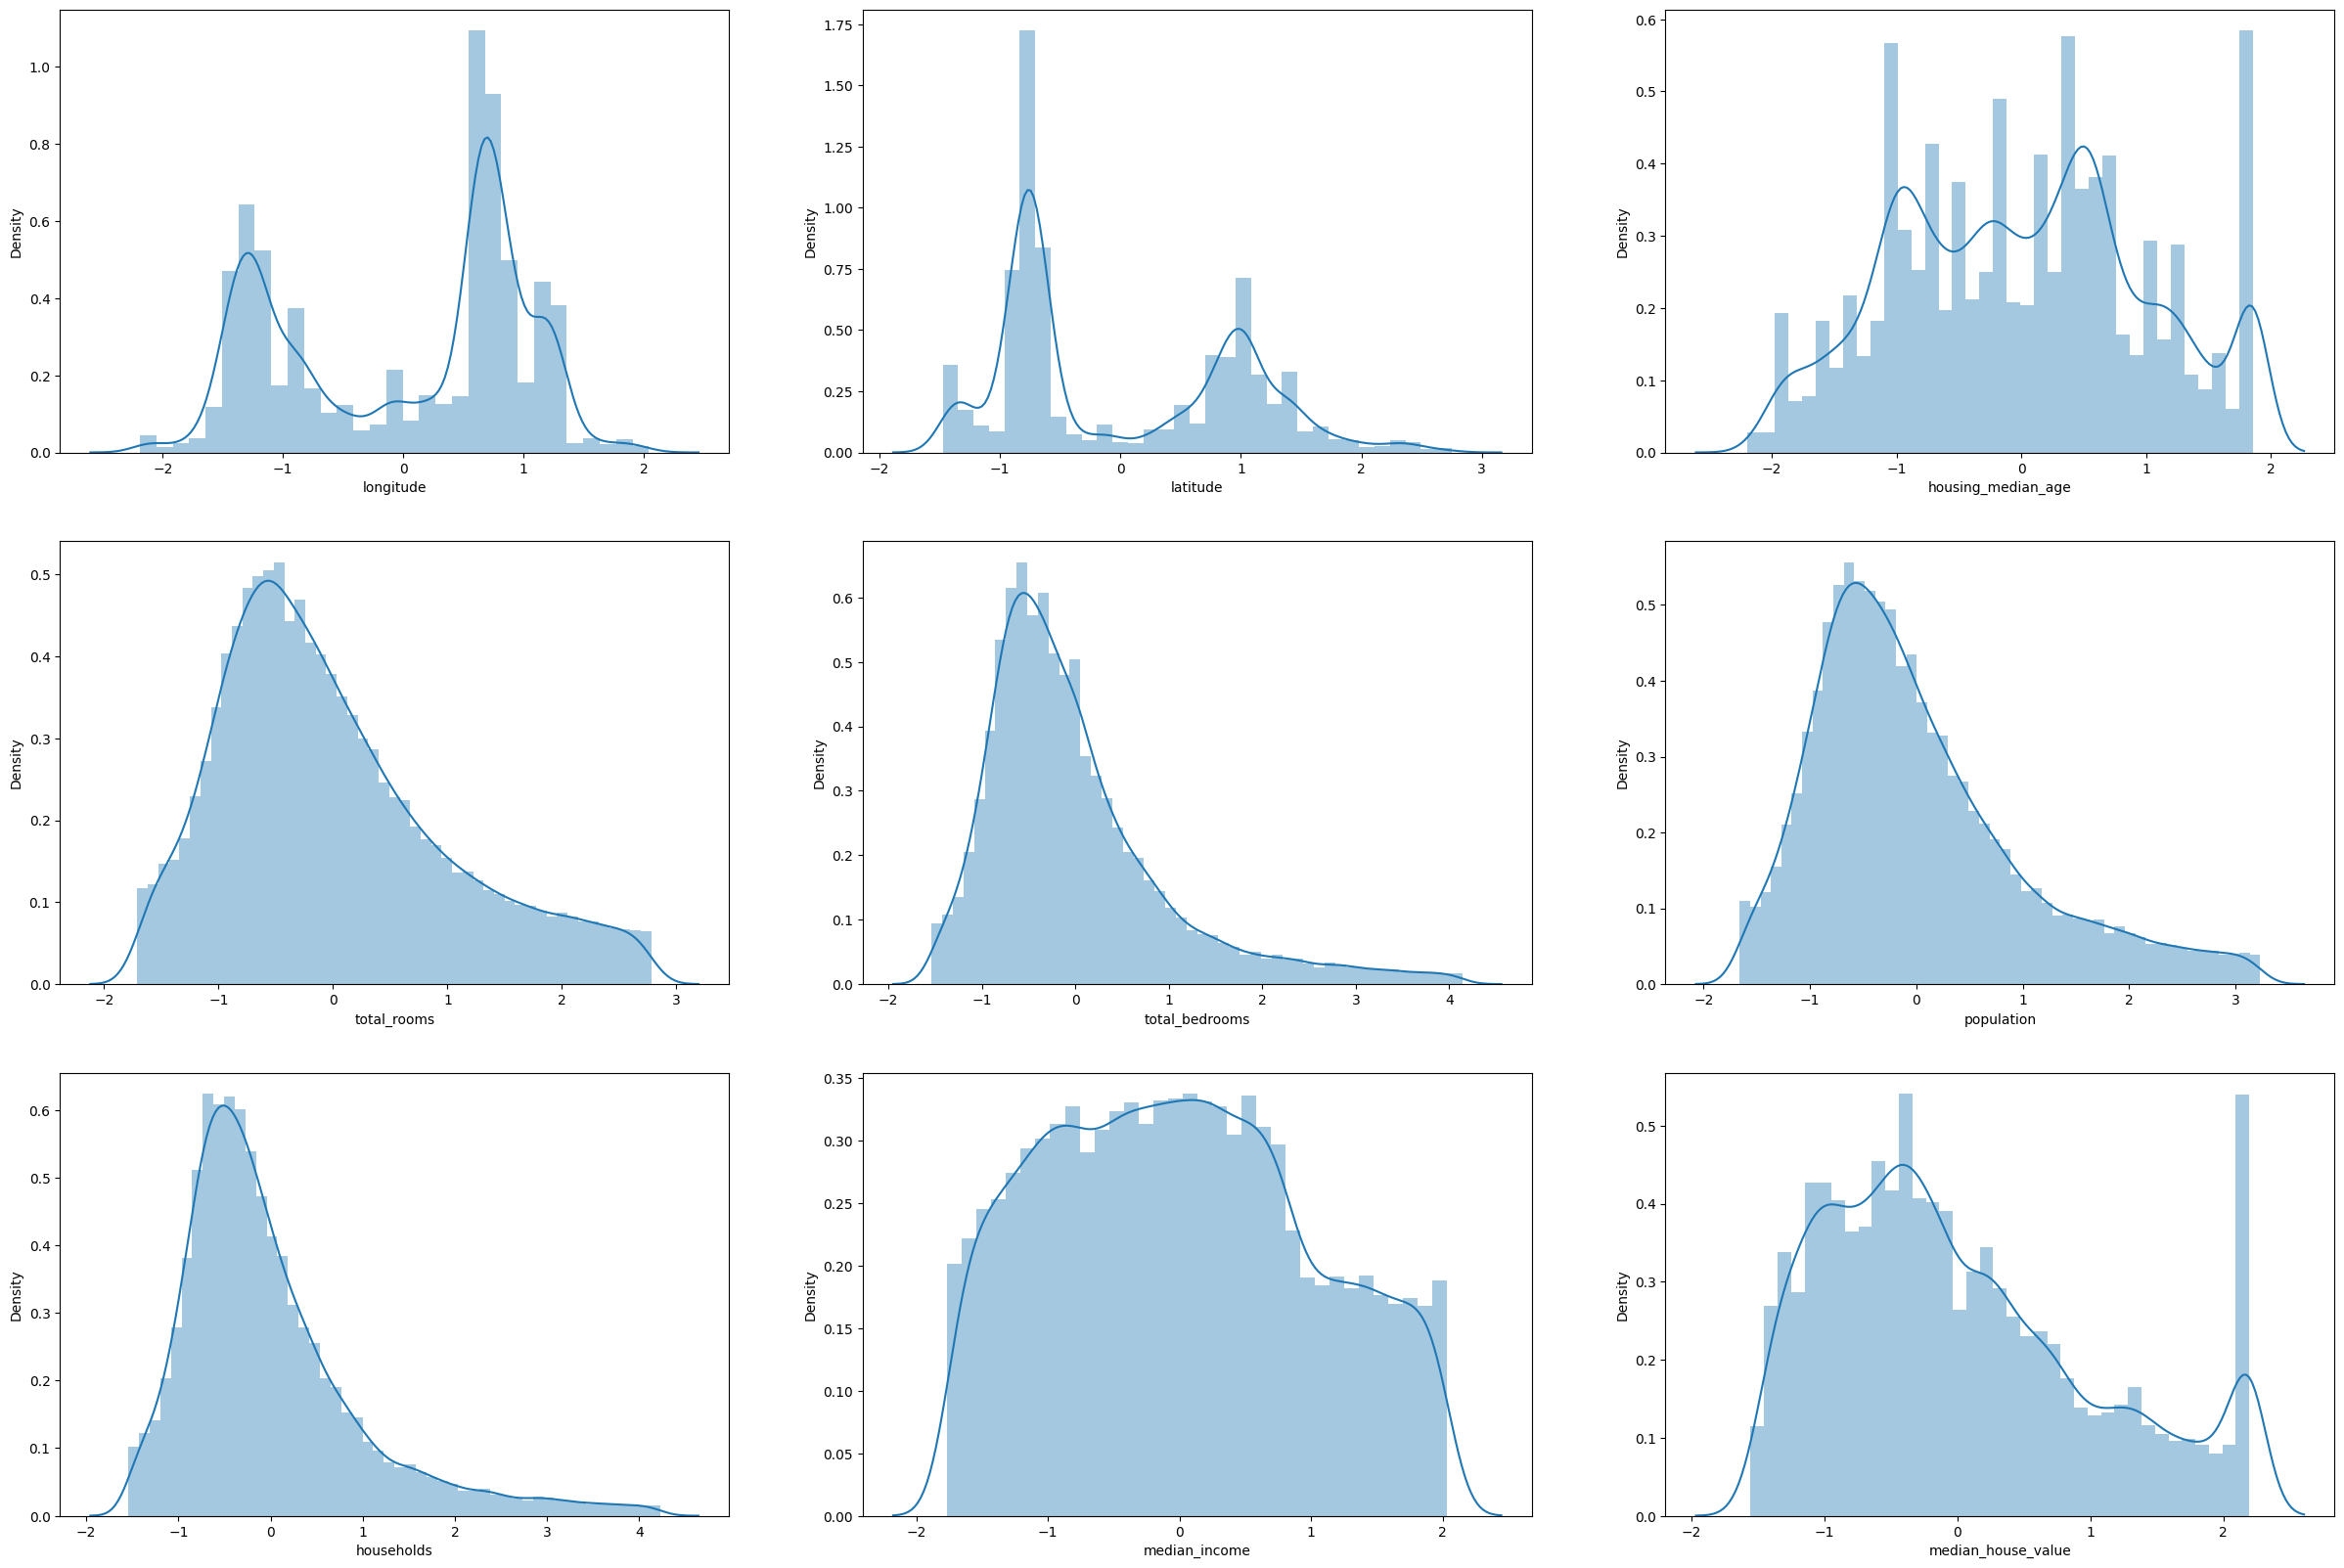

In [192]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
fig, axes = plt.subplots (ncols=3, nrows=3, figsize=(30,20))
for i, column in enumerate(columns):
  sns.distplot(housing_scaled_df[column], ax=axes[i//3,i%3])
plt.show()

In [193]:
housing_scaled_df['ocean_proximity']=ocean_prox
housing_scaled_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.336003  1.052330            0.982143    -1.152722       -1.160268   
1      -1.330980  1.042519           -0.607019     2.274167        1.724131   
2      -1.341027  1.037613            1.856182    -0.710910       -0.979993   
3      -1.346050  1.037613            1.856182    -0.857170       -0.847003   
4      -1.346050  1.037613            1.856182    -0.589657       -0.714014   
...          ...       ...                 ...          ...             ...   
20635  -0.763351  1.837273           -0.289187    -0.560860       -0.436213   
20636  -0.823631  1.842179           -0.845393    -1.286857       -1.098206   
20637  -0.828654  1.812743           -0.924851    -0.114500       -0.108172   
20638  -0.878887  1.812743           -0.845393    -0.413084       -0.332776   
20639  -0.838700  1.783308           -1.004309     0.287147        0.281932   

       population  households  median_income  median_house_value  income_bin  \
0       -1.288097   -1.145860       1.882802            2.023402    1.890128   
1        1.292263    2.050626       1.881333            1.446535    1.890128   
2       -1.070339   -0.983488       1.743261            1.390899    1.890128   
3       -0.992299   -0.849771       1.252079            1.293290    0.941894   
4       -0.983488   -0.722421       0.190689            1.301099   -0.006340   
...           ...         ...            ...                 ...         ...   
20635   -0.631049   -0.496375      -1.547252           -1.196706   -0.954574   
20636   -1.245300   -1.184065      -0.830748           -1.206467   -0.954574   
20637   -0.427138   -0.168448      -1.460002           -1.058102   -0.954574   
20638   -0.761955   -0.435883      -1.351895           -1.132284   -0.954574   
20639    0.051173    0.140375      -0.956187           -1.086408   -0.954574   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 11 columns]

<ipython-input-194-285e845585c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing_scaled_df.corr(), annot= True, cmap= "YlGnBu")


<Axes: >

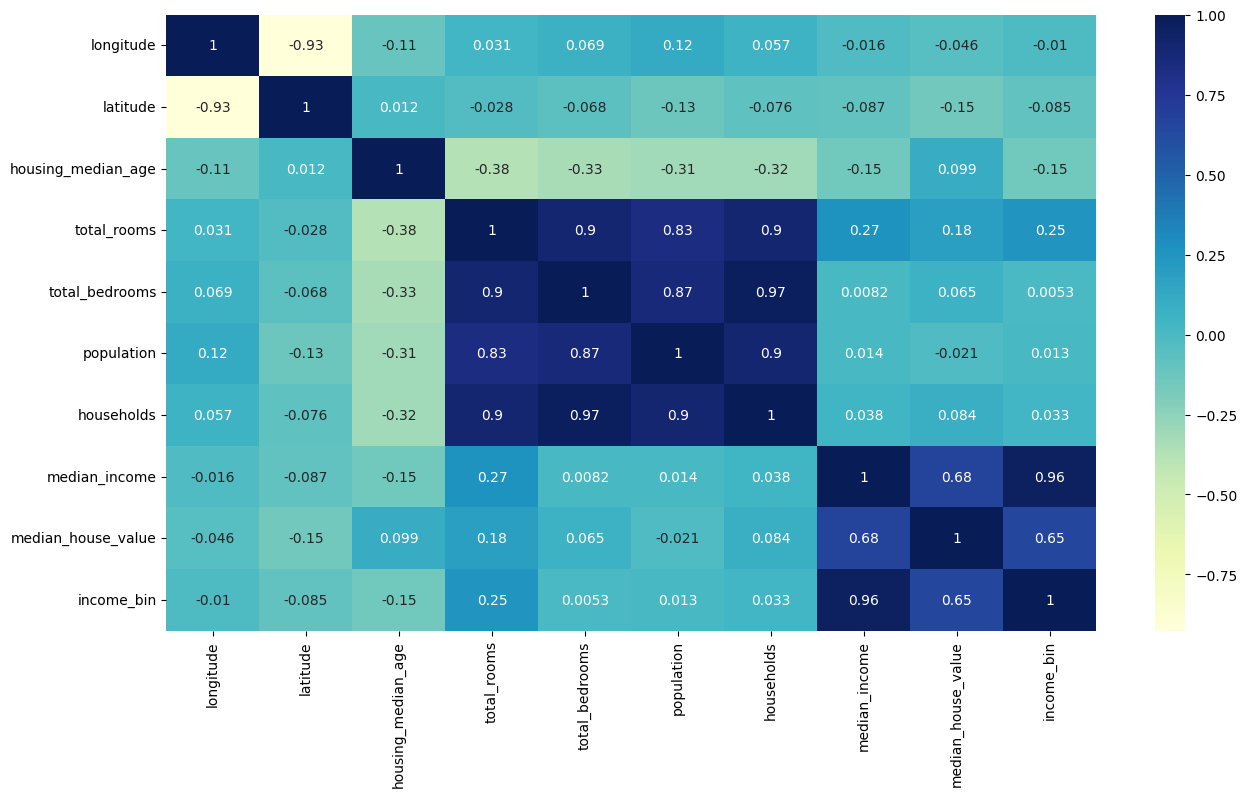

In [194]:
plt.figure(figsize=(15,8))
sns.heatmap(housing_scaled_df.corr(), annot= True, cmap= "YlGnBu")


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'income_bin'}>, <Axes: >, <Axes: >]],
      dtype=object)

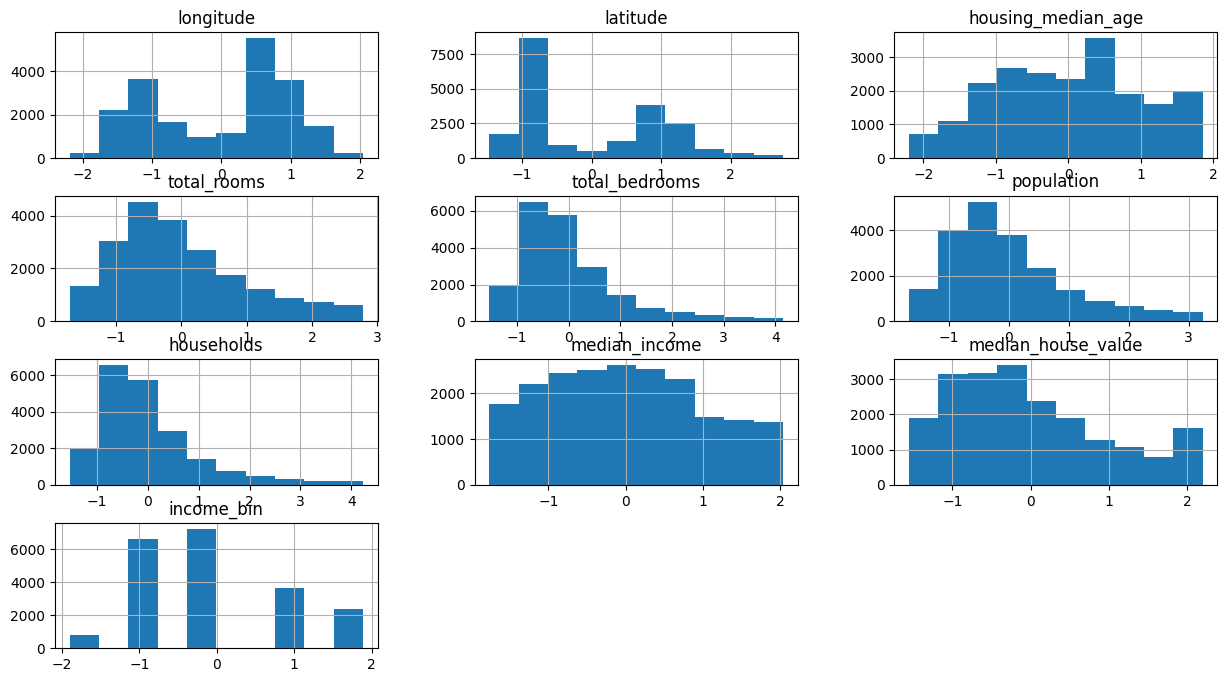

In [195]:
housing_scaled_df.hist(figsize=(15,8))

<Axes: xlabel='latitude', ylabel='longitude'>

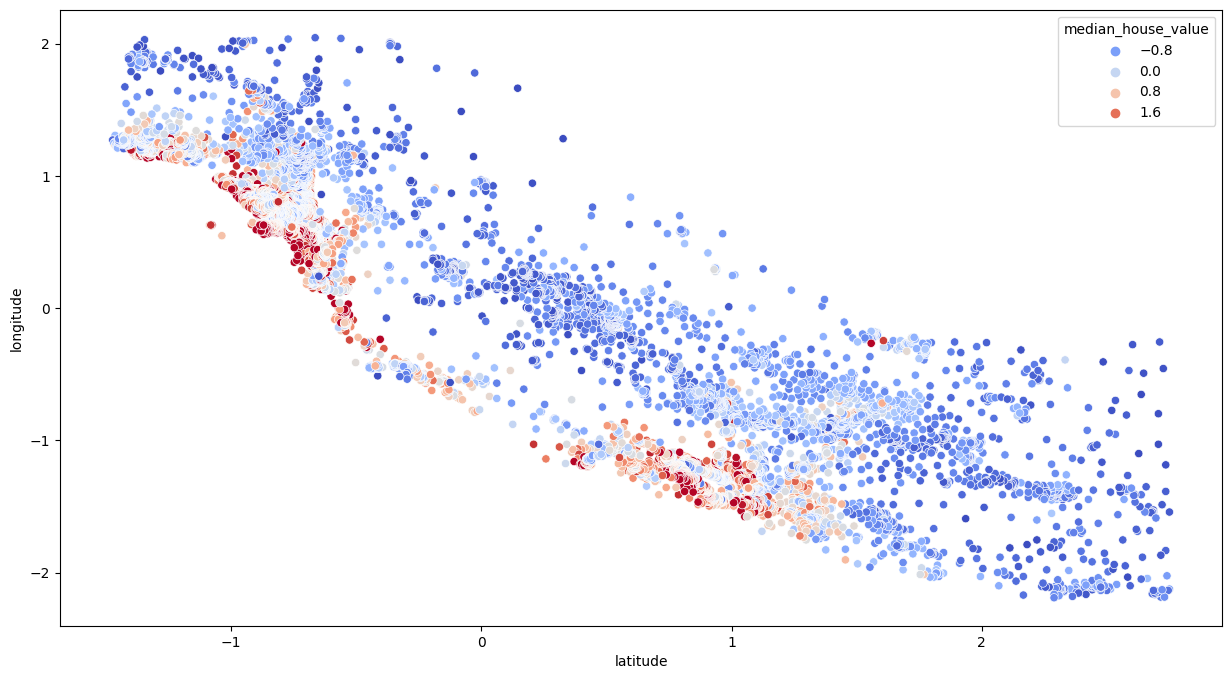

In [196]:
plt.figure(figsize= (15, 8))
sns.scatterplot (x= "latitude", y ="longitude", data =housing_scaled_df, hue="median_house_value", palette= "coolwarm")

In [197]:
housing_scaled_df['bedroom_ratio']= housing_scaled_df['total_bedrooms'] / housing_scaled_df['total_rooms']
housing_scaled_df[ "household_rooms"]= housing_scaled_df['total_rooms']/ housing_scaled_df['households']
housing_scaled_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.336003  1.052330            0.982143    -1.152722       -1.160268   
1      -1.330980  1.042519           -0.607019     2.274167        1.724131   
2      -1.341027  1.037613            1.856182    -0.710910       -0.979993   
3      -1.346050  1.037613            1.856182    -0.857170       -0.847003   
4      -1.346050  1.037613            1.856182    -0.589657       -0.714014   
...          ...       ...                 ...          ...             ...   
20635  -0.763351  1.837273           -0.289187    -0.560860       -0.436213   
20636  -0.823631  1.842179           -0.845393    -1.286857       -1.098206   
20637  -0.828654  1.812743           -0.924851    -0.114500       -0.108172   
20638  -0.878887  1.812743           -0.845393    -0.413084       -0.332776   
20639  -0.838700  1.783308           -1.004309     0.287147        0.281932   

       population  households  median_income  median_house_value  income_bin  \
0       -1.288097   -1.145860       1.882802            2.023402    1.890128   
1        1.292263    2.050626       1.881333            1.446535    1.890128   
2       -1.070339   -0.983488       1.743261            1.390899    1.890128   
3       -0.992299   -0.849771       1.252079            1.293290    0.941894   
4       -0.983488   -0.722421       0.190689            1.301099   -0.006340   
...           ...         ...            ...                 ...         ...   
20635   -0.631049   -0.496375      -1.547252           -1.196706   -0.954574   
20636   -1.245300   -1.184065      -0.830748           -1.206467   -0.954574   
20637   -0.427138   -0.168448      -1.460002           -1.058102   -0.954574   
20638   -0.761955   -0.435883      -1.351895           -1.132284   -0.954574   
20639    0.051173    0.140375      -0.956187           -1.086408   -0.954574   

      ocean_proximity  bedroom_ratio  household_rooms  
0            NEAR BAY       1.006546         1.005989  
1            NEAR BAY       0.758137         1.109011  
2            NEAR BAY       1.378506         0.722845  
3            NEAR BAY       0.988139         1.008707  
4            NEAR BAY       1.210896         0.816224  
...               ...            ...              ...  
20635          INLAND       0.777757         1.129913  
20636          INLAND       0.853402         1.086813  
20637          INLAND       0.944727         0.679736  
20638          INLAND       0.805590         0.947694  
20639          INLAND       0.981836         2.045567  

[20640 rows x 13 columns]

<ipython-input-198-285e845585c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing_scaled_df.corr(), annot= True, cmap= "YlGnBu")


<Axes: >

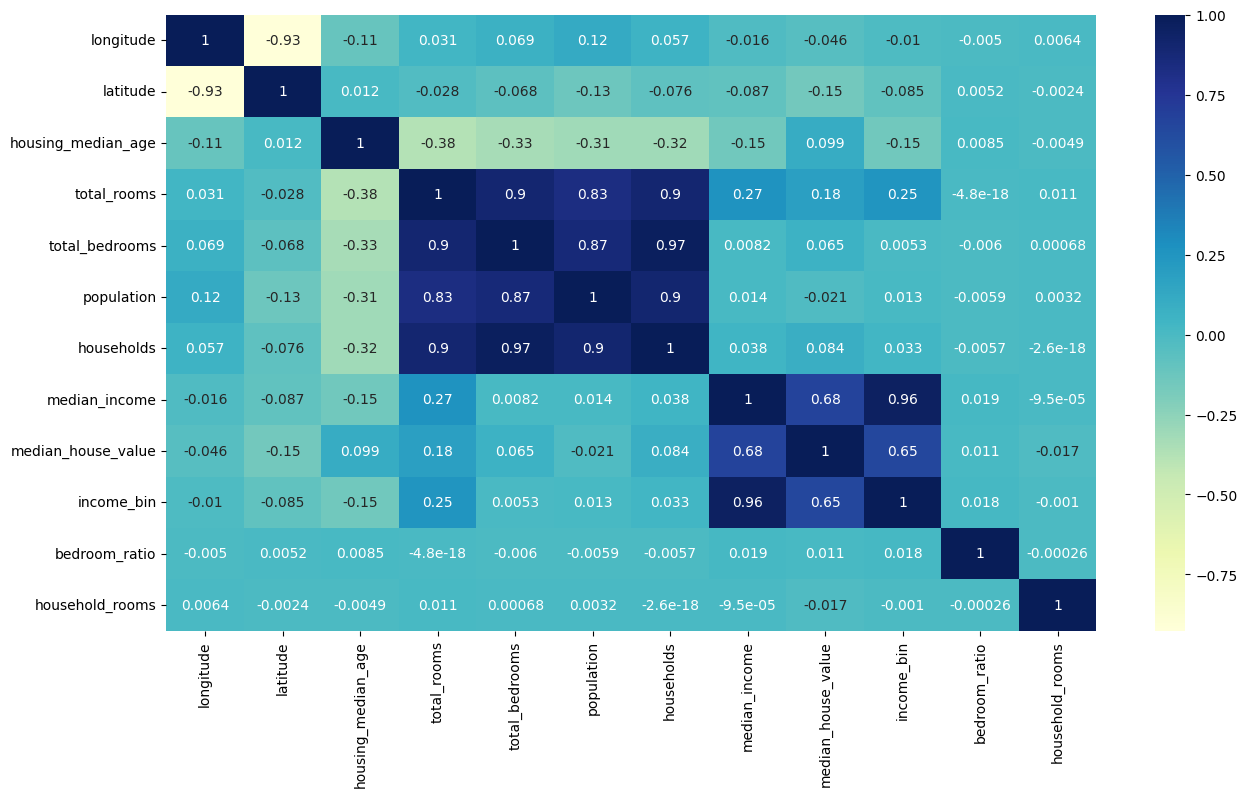

In [198]:
plt.figure(figsize=(15,8))
sns.heatmap(housing_scaled_df.corr(), annot= True, cmap= "YlGnBu")

In [199]:
train_set2, test_set2=train_test_split(housing_scaled_df,test_size=0.2,random_state=1234)
train_set2['median_income'].value_counts()/len(test_set2)

 2.032918    0.009932
 0.376939    0.008963
-0.566649    0.008963
-0.769056    0.008479
-0.359835    0.008479
               ...   
 0.708899    0.000242
 1.015594    0.000242
-0.144796    0.000242
 1.093737    0.000242
 1.141621    0.000242
Name: median_income, Length: 10945, dtype: float64

In [200]:
test_set2['median_income'].value_counts()/len(test_set2)

 0.277939    0.003876
-0.359835    0.003391
 0.473002    0.002422
 0.536162    0.002180
-1.511412    0.002180
               ...   
 1.969758    0.000242
-0.326639    0.000242
-0.238508    0.000242
 0.741801    0.000242
 2.027630    0.000242
Name: median_income, Length: 3441, dtype: float64

In [201]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, random_state=1234)
for  train_index, test_index in split.split(housing_scaled_df,housing_scaled_df['income_bin']):
  stratified_train2=housing_scaled_df.loc[train_index]
  stratified_test2=housing_scaled_df.loc[test_index]

In [202]:
stratified_train2['income_bin'].value_counts()/len(stratified_train2)

-0.006340    0.350560
-0.954574    0.318852
 0.941894    0.176303
 1.890128    0.114449
-1.902808    0.039836
Name: income_bin, dtype: float64

In [203]:
stratified_test2['income_bin'].value_counts()/len(stratified_test2)

-0.006340    0.350775
-0.954574    0.318798
 0.941894    0.176357
 1.890128    0.114341
-1.902808    0.039729
Name: income_bin, dtype: float64

In [204]:
from sklearn.linear_model import LinearRegression
housing_scaled_df = housing_scaled_df.join(pd.get_dummies(housing_scaled_df['ocean_proximity'])).drop(['ocean_proximity'], axis=1)
housing_scaled_df['bedroom_ratio']= housing_scaled_df['total_bedrooms'] / housing_scaled_df['total_rooms']
housing_scaled_df[ "household_rooms"]= housing_scaled_df['total_rooms']/ housing_scaled_df['households']
X = housing_scaled_df.drop('median_house_value', axis=1)  # Replace 'target_variable_name' with the actual target variable name
y = housing_scaled_df['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Create and train the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = linear_reg_model.predict(X_test)
linear_reg_model.score(X_test,y_test)

0.645636970737024

In [206]:
from sklearn.metrics import mean_squared_error

# Assuming linear_reg_model is your trained model
train_predictions = linear_reg_model.predict(X_train)
test_predictions = linear_reg_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Mean Squared Error on Training Set:", train_mse)
print("Mean Squared Error on Testing Set:", test_mse)


Mean Squared Error on Training Set: 0.3472783828257623
Mean Squared Error on Testing Set: 0.3591336858113718


In [207]:
from sklearn.model_selection import cross_val_score

# Assuming linear_reg_model is your trained model
cv_scores = cross_val_score(linear_reg_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Average RMSE:", np.mean(cv_rmse_scores))


Cross-Validation RMSE Scores: [0.65785409 0.65909552 0.63305663 0.65783632 0.57548623]
Average RMSE: 0.6366657572417374
